In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red"> ch10. N차원배열(Numby 배열) 다루기 </font></b>

- [numpy](http://www.numpy.org)
- [numpy_docs](https://numpy.org/doc/)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(c언어로 구현된 고성능 수치계산 패키지)

# 1절. 넘파이 패키지

In [2]:
# tensorflow(딥러닝) 2.10 버전을 쓰기 위해 낮은 버전의 numpy를 쓰는것. 아나콘다나 다른 패키지도 그래서 낮은 버전 사용.

import numpy as np
np.__version__

'1.23.5'

In [4]:
# np. arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성

a = np.arange(15) # 0부터 15까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [5]:
from numpy import arange
a = arange(15).reshape(3,5) # 3행 5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:
type(a) # a변수의 타입

numpy.ndarray

In [7]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [8]:
a.dtype.name

'int32'

In [9]:
a.itemsize # a 배열안 한 요소의 bytesize

4

In [10]:
a.ndim # 축수(차원수)

2

In [11]:
a.size # 배열 요소의 갯수

15

In [12]:
a.shape # 배열의 구조(3행 5열)

(3, 5)

In [15]:
print('shape 조정 전 a\n', a)
a.shape = (5,3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [17]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
a.size # 요소갯수

12

In [19]:
a.dtype

dtype('int32')

In [20]:
a.itemsize

4

In [21]:
a.dtype = np.int64 # 읽을 떄 int64로(64bit씩) 읽는다. 데이터를 바꾸는게 아님. 타입을 바꾸고 싶으면 이렇게 변경하면 큰일남.
a.dtype 

dtype('int64')

In [22]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [23]:
# 배열요소의 타입을 수정 (a자체를 수정하는게 아니라 수정해서 출력만 하는것이기 때문에 할당을 해줘야한다.)

a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a = a.astype('int64')
# a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [28]:
a.itemsize

8

In [29]:
a.size

12

In [30]:
a.ravel() # flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [31]:
a # 모든 함수는 a자체를 바꾸는게 아님

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [32]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

- pkl(객체저장, 배열, 머신러닝모델) vs npy(넘파이 전용 포맷, io 속도 개선)

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [37]:
%%time 
# 매직명령어는 옆에 주석쓰면 안됨. 그리고 제일 위에 적어야함. 이건 이 셀 수행하는데 몇초걸렸어? 하는 물음.
import pickle
with open('data/ch10.pkl','wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 0 ns


In [38]:
%%time
with open('data/ch10.pkl','rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 1.99 ms


In [36]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [39]:
%%time
np.save('data/ch10.npy', a) # npy파일로 저장

CPU times: total: 0 ns
Wall time: 0 ns


In [40]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 15.6 ms
Wall time: 9.97 ms


# 2절. 넘파이 배열

- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty......linspace
- 랜덤값을 갖는 함수들 : np.random.~ 

## 2.1 array() 함수로 넘파이 배열 만들기

- array(obj, dtype=np.intxx or dtype='intxx', copy = T/F)

In [41]:
a = np.array([2, 4, 6], dtype = np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [42]:
a[0], a[1], a[2] # 리스트랑 똑같이 인덱싱 가능

(2, 4, 6)

In [43]:
for i in a:
    print(i, end='\t')

2	4	6	

In [46]:
b = np.array([[1.5, 2.3],  # 배열은 동일 자료형의 집합 : 정수 → 실수 → 문자
            [4, 5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [48]:
b[0][1], b[0,1] # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [47]:
# 리스트는 이렇게 하지만 배열에서는 이런식으로 쓰면 없어보임. 무조건 b[0,1]이렇게 쓰기

l = [[1.5, 2.3], [4, 5]]
l[0][1]

2.3

In [50]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [52]:
b = b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [54]:
print(b.dtype) 
print(b.itemsize)

float32
4


In [56]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() #개행

1.5	2.3	
4.0	5.0	


In [59]:
# 0행 1열이 이상하게 나오는 이유는 float64에서 float32로 줄이면서 데이터가 변질된것. 이건 다시 늘린다고 원래대로 돌아오지 않음. 그래서 소숫점 1자리만 나와 {:.1f} 을 적은것

for i, row in enumerate(b):
    for j, item in enumerate(row):
        print(f'{i}행{j}열 : {item:.1f}({b[i,j]:.1f})', end='\t')
    print() # 개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [61]:
# 행렬의 인덱싱, 슬라이싱

b = np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [62]:
# b[3,0] # 없는 인덱싱시 에러

b[0,1]

2

In [95]:
print('0~1행, 1~2열 :\n', b[:2,1:3]) 
print('2행모두(1차원) :', b[2,:], b[2]) # 특정행, 모든열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3,:], b[2:3])
print('4열(마지막열)모두(1차원) :', b[:,4], b[...,4], b[:,-1]) # 모든행, 특정열을 추출할 경우
print('4열(마지막열)모두(2차원) :\n', b[:,4:]) # 모든행, 특정열을 추출할 경우
print('2행 0~3열 :', b[2,:-1]) 
print('마지막열 제외:\n', b[:, :-1]) 

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막열)모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
4열(마지막열)모두(2차원) :
 [[ 5]
 [ 0]
 [15]]
2행 0~3열 : [11 12 13 14]
마지막열 제외:
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [97]:
# 스칼라변수

a = 10
copy_a = a
print(f'a={a}, 복제본{copy_a}')
copy_a = -1
print(f'a={a}, 복제본{copy_a}')

a=10, 복제본10
a=10, 복제본-1


In [98]:
# 데이터구조 

a = [0,1]
copy_a = a.copy() # 깊은복사
print(f'a={a}, 복제본{copy_a}')
copy_a[0] = -1
print(f'a={a}, 복제본{copy_a}')

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [105]:
# numpy 배열 

c = np.array([[1,2], [3,4]])
# 복제가 아닌 주소할당
#d = c 

#깊은복사
# d = np.array(c, copy=True) 이렇게 쓸 수도 있지만 밑에가 더 간단함
d = c.copy()
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1919653559152 1919653548880
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기

- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값이 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성을 따로 지정 가능

In [110]:
x = np.zeros((3,)) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [112]:
x = np.zeros((2,5), dtype=np.int16) # dtype=np.bool8 이렇게 bool타입을 넣을수도 있음
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [114]:
np.ones((2,5), dtype=np.int8) #uint8 도 있음. 이건 unsigned라는 뜻으로 int의 제일 앞자리수는 부호. 0000 0000 은 양수, 1000 0001은 음수를 뜻함

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [115]:
np.full((2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

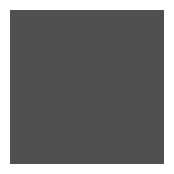

In [125]:
# 이미지. 이것도 대부분이 plt라는 이름으로 씀. import numpy as np처럼

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기의 figsize=(가로,세로)
img = np.full((28,28), 80, dtype=np.uint8) # 이건 회색그림. 이미지는 8비트를 넘어가지 않고 양수만 나오기 때문에 uint8 사용
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # axis가 축. 축 없애라는 명령
plt.show()

In [126]:
np.empty((3,2)) # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기

*n차원 (normal을 제일 많이쓰고 그 다음이 random)
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값 
- np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균 loc과 표준편차 scale을 갖는 정규분포 랜덤값

*1차원
- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차 1)

cf) np.random.randint(from, to) : from(0)부터 to미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [130]:
import random
random.randint(1, 3) # 1,2,3

3

In [131]:
np.random.randint(1, 3) # 1,2

1

In [132]:
np.random.random((2,3)) # 0부터 1미만의 2행 3열 

array([[0.08838504, 0.35293641, 0.93929155],
       [0.26236233, 0.42197591, 0.91192611]])

In [133]:
np.random.rand(2)

array([0.56742459, 0.05432445])

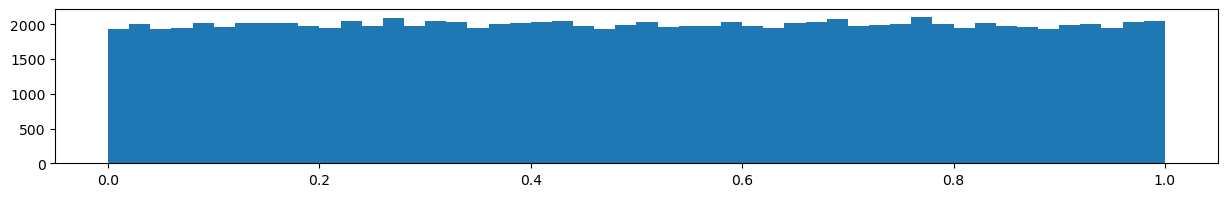

In [142]:
# 밀도

import matplotlib.pyplot as plt
x = np.random.rand(100000)
plt.figure(figsize=(15,2)) # 그래프 크기
plt.hist(x, bins = 50)
plt.show()

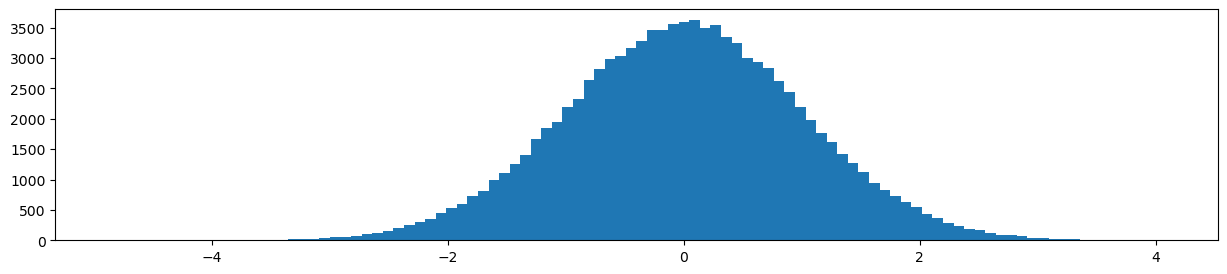

In [146]:
# 정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)

x = np.random.randn(100000)
plt.figure(figsize=(15,3)) # 그래프 크기
plt.hist(x, bins = 100)
plt.show()

In [147]:
# 1차원 난수 배열

print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.26908337 0.60440953 0.54788806]
[-1.04847874 -1.6252302   1.79662515]


In [148]:
# 2차원 난수 배열

np.random.random((2,5)) # 2행 5열짜리 균등분포(0~1미만) 난수 배열

array([[0.22280533, 0.88301098, 0.52661547, 0.94884824, 0.2780749 ],
       [0.52637164, 0.0102849 , 0.91744295, 0.68385075, 0.79352953]])

In [149]:
np.random.uniform(low=-2, high =2, size=(2,5)) # 2행 5열짜리 균등분포(-2~2미만) 난수배열

array([[-0.12848957, -1.74535156,  0.06423906, -0.38750544,  1.26624303],
       [ 0.94406107,  1.47609825, -0.39815911,  0.83651018,  1.35306785]])

In [151]:
np.random.normal(size=(2,5)) # 2행 5열짜리 정규분포(평균0, 표준편차1) 난수배열

array([[-0.06645286, -1.58755304, -0.5022389 , -0.34202815, -1.64422421],
       [ 1.2037938 , -0.49560096,  0.18864937, -2.30840578, -0.57997331]])

In [152]:
np.random.normal(-1, 1, (2,5)) # 2행 5열짜리 정규분포(평균-1, 표준편차1) 난수배열 #순서인수라서 loc=-1 이렇게 안써도됨

array([[-0.62790633, -0.68578488, -2.19300084,  1.23474336, -2.24546482],
       [-1.10683143, -1.48809155,  0.36900238, -0.46182277, -1.12972675]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기

- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성 

In [153]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [154]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [156]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [167]:
# linspace : 특정한 범위의 수들을 많이 생성할 때

from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

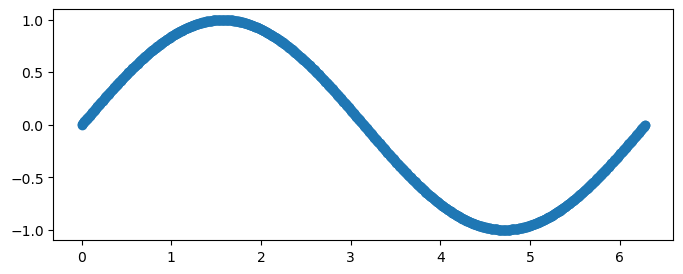

In [168]:
plt.figure(figsize=(8,3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경

- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [169]:
t = np.random.random((2,3))
t

array([[0.34638121, 0.958199  , 0.6305063 ],
       [0.91449359, 0.08713092, 0.65545989]])

In [171]:
a = np.round(t*10) # round는 반올림
a

array([[ 3., 10.,  6.],
       [ 9.,  1.,  7.]])

In [173]:
a = a.astype(np.int16)
a

array([[ 3, 10,  6],
       [ 9,  1,  7]], dtype=int16)

In [174]:
a.reshape(3,2)

array([[ 3, 10],
       [ 6,  9],
       [ 1,  7]], dtype=int16)

In [175]:
a # a자체가 바뀐게 아님

array([[ 3, 10,  6],
       [ 9,  1,  7]], dtype=int16)

In [176]:
a.reshape(-1, 1) # -1이 주어지면 해당차원의 크기가 자동 계산

array([[ 3],
       [10],
       [ 6],
       [ 9],
       [ 1],
       [ 7]], dtype=int16)

In [177]:
a.reshape(3,-1) # -1은 엄청 잘씀. reshape 할때마다 쓴다고보면된다.

array([[ 3, 10],
       [ 6,  9],
       [ 1,  7]], dtype=int16)

In [179]:
a.resize(2,3) # 실행결과가 출력안되면 a가 바뀜
a

array([[ 3, 10,  6],
       [ 9,  1,  7]], dtype=int16)

In [180]:
a.reshape(3,2) # a를 쓰지 않아도 출력되니까 a가 바뀐게 아님

array([[ 3, 10],
       [ 6,  9],
       [ 1,  7]], dtype=int16)

In [181]:
a.resize((3,2)) # 튜플에 넣을수도 있음. reshape도.
a

array([[ 3, 10],
       [ 6,  9],
       [ 1,  7]], dtype=int16)

In [ ]:
# a.resize(2,-1) resize는 -1 사용불가

In [182]:
# 전치행렬 (x행 y열 → y행 x열)
a.T # a의 전치행렬

array([[ 3,  6,  1],
       [10,  9,  7]], dtype=int16)

In [183]:
a.transpose() # a의 전치행렬. 둘다 a가 바뀐게 아님. 출력하니까.

array([[ 3,  6,  1],
       [10,  9,  7]], dtype=int16)

## 2.6 배열출력

In [185]:
np.arange(2000) # 1000까지는 다 출력해주고 1001부터는 ..., 으로 생략

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [187]:
# 배열 요소가 몇개까지 다 출력되나. 1000개 요소 초과는 생략되어 출력

np.get_printoptions()['threshold']

1000

In [188]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리부분만 출력

np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [190]:
# 인쇄옵션 변경

import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf)      # 무한대까지 출력가능

In [191]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작

### 1) 배열의 요소별 연산

In [2]:
import numpy as np

# 리스트

a = [10, 20, 30, 40]
b = list(range(4))
a+b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [3]:
# 배열. numpy array

a = np.array([10,20,30,40])
b = np.arange(4)
a, b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [4]:
a+b #리스트의 경우 a+b하면 뒤에 연결을 시켰는데 배열은 요소별 연산을 한다.

array([10, 21, 32, 43])

In [5]:
a*3 # 요소별*3 연산

array([ 30,  60,  90, 120])

In [6]:
a * b # 요소별*연산. 리스트끼리는 *가 안됨

array([  0,  20,  60, 120])

In [7]:
a**b # 요소별 제곱연산

array([    1,    20,   900, 64000])

In [8]:
a < 40 # 요소별 연산

array([ True,  True,  True, False])

In [12]:
print(a[[0,3]]) # 0,3번째 인덱스 item
print(a[[True, False, False, True]]) # 0은 True, 1은 False, 2는 False, 3은 True

[10 40]
[10 40]


In [13]:
# a배열에서 40보다 작은 데이터만 추출(boolean index)

a[a<40]

array([10, 20, 30])

In [14]:
# a배열에서 40보다 작은 데이터의 index(잘 안하는 짓)

np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2) 행렬의 곱(@, dot함수)

cf. *(요소별 곱)

In [15]:
A = np.array([[1,1],
            [0,1]])
B = np.array([[2,0],
             [3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [17]:
print('요소별 곱 A*B =', A*B, sep='\n')
print('행렬곱 A@B =', A@B, sep='\n')
print('행렬곱 A.dot(B) =', A.dot(B), sep='\n') #이거보다는 @를 더 많이씀

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A.dot(B) =
[[5 4]
 [3 4]]


In [18]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안함

print('A@B =', A@B, sep='\n')
print('B@A =', B@A, sep='\n')

A@B =
[[5 4]
 [3 4]]
B@A =
[[2 2]
 [3 7]]


In [19]:
# pdf 19페이지 확인(1)

A = np.array([[1,2],
            [3,4]])
B = np.array([[-1,-1],
             [1,1]])
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [21]:
# pdf 19페이지 확인(3)

A = np.array([[1,2],
            [3,4]])
B = np.array([[6],
             [7]])
A@B, # B@A 이건 에러남. 행렬이 다르니까

(array([[20],
        [46]]),)

In [20]:
# pdf 19페이지 확인(3)

A = np.array([[1,2,3],
            [3,4,1]])
B = np.array([[0,0],
             [1,1],
             [-1,2]])
A@B, B@A

(array([[-1,  8],
        [ 3,  6]]),
 array([[ 0,  0,  0],
        [ 4,  6,  4],
        [ 5,  6, -1]]))

In [22]:
# B가 단위행렬. 단위행렬에서는 교환법칙 성립.
# pdf 19페이지 확인(4) 

A = np.array([[2,0],
            [3,4]])
B = np.array([[1,0],
             [0,1]])
A@B, B@A # B : 2행 2열짜리 단위행렬

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [23]:
np.eye(2) #2행 2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [24]:
np.eye(3) #3행 3열짜리 단위행렬(정방행렬 : 행과 열수가 같은것)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입 연산자 사용(+=, -=, *=,...)

- 배열에서의 a += b는 a = a+b와 다소 다르게 작동한다

In [ ]:
# 스칼라데이터에서는 a += b는 a = a+b 같다.

a = 10
a += 10
a = a+10

In [37]:
# 배열에서의 a += b는 a = a+b와 다소 다르게 작동한다

a = np.ones((2,3), dtype='int8') # 2행3열짜리 int8 배열
b = np.random.random((2,3)) # 2행3열짜리 rondom값(0부터 1미만의 균등분포를 갖는) float64 배열
print(a, b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.57867615 0.74557923 0.07109059]
 [0.95081226 0.98072849 0.51415884]]


In [29]:
a += 3
a

array([[4, 4, 4],
       [4, 4, 4]], dtype=int8)

In [30]:
a = a+3
a

array([[7, 7, 7],
       [7, 7, 7]], dtype=int8)

In [35]:
a += 256 # a+256 결과를 a에 넣는데, 공간이 부족하면 앞이 짤림
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [38]:
a = a+256 # a+256 결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [39]:
# a는 int16, b는 float64

b += a # b+a의 결과를 b에 넣는다
b

array([[257.57867615, 257.74557923, 257.07109059],
       [257.95081226, 257.98072849, 257.51415884]])

In [ ]:
a += b # a+b의 결과를 a에 넣는다 → 이건 에러남. 그래서 복합대입 연산자는 배열에서 쓸일이 없다.
a

### 4) 배열 요소별 집계

- sum, min, max, mean(평균), var(분산), std(표준편차)

In [40]:
a = np.array([[2,2,2,3],
             [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [43]:
print('전체 합 :', a.sum(), np.sum(a)) # 둘중 아무거나 씀
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


In [44]:
# 분산에 루트를 씌우면 표준편차

import math
math.sqrt(a.var()) # math.sqrt(스칼라데이터)

0.8569568250501305

### 5) 배열 축별 집계

- 축별 sum, min, max, mean(평균), var(분산), std(표준편차), argmax(최대값 index)

In [45]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [47]:
# 행별 합계 (axis=0(행), axis=1(열)) : 행을 고정하고 열(axis1축)들의 합

print('a 행별 합 :', a.sum(axis=1), np.sum(a, axis=1)) # 우리랑 문화가 안맞아서 axis=1 넣으면 열들의 합을 해서 우리는 같은 행별 합이라고 말함.
print('a 행별 평균 :', a.mean(axis=1), np.mean(a, axis=1))

a 행별 합 : [ 9 10] [ 9 10]
a 행별 평균 : [2.25 2.5 ] [2.25 2.5 ]


In [48]:
# 열별 합계 : 열을 고정하고 행(axis0축)들의 합

print('a 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a 열별 합 : [6 5 4 4] [6 5 4 4]


## 2.8 그 외 요소별 계산하는 범용함수들

- 메모리를 효율적으로 사용할 수 있음
    * np.add(A, B, C) : C=A+B : C = np.add(A, B)
    * np.multiply(A, B, C) : C=A*B : C = np.multiply(A, B)
    * np.subtract(A, B, C) ...
    * np.sqrt(배열) : 제곱근      cf. math.sqrt(스칼라변수)

In [49]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty((2,))
a,b,c

(array([1, 2]), array([3, 4]), array([1.06099790e-313, 8.48798317e-314]))

In [51]:
%%time
np.add(a,b,c)
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4., 6.])

In [52]:
%%time
c = a+b
c # 지금 이정도 정보로는 차이가 안나지만 많아지면 위에 add가 더 빠름

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [53]:
# 메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install 라이브러리이름(memory_profiler)

%load_ext memory_profiler
A = np.random.randn(100000000) # 1억개 요소
B = np.random.randn(100000000)
C = np.random.randn(100000000)

In [54]:
A, B, C

(array([ 0.72650949, -0.62602313,  0.05680598, ..., -0.00099112,
        -0.18934736,  0.62622548]),
 array([-1.35195665,  0.46402235, -1.98481999, ..., -0.59890717,
         0.62127625, -0.11587453]),
 array([-1.74502247,  1.38670416, -1.02191367, ...,  0.91440664,
         0.55186243, -1.68333955]))

In [ ]:
# %%time : 셀 실행시 소요시간 출력(반드시 셀 맨위에)
# %memit : 메모리 사용량 출력

In [55]:
%%time
%memit G = A*B+C
print(G)

peak memory: 3640.67 MiB, increment: 1240.84 MiB
[-2.7272318   1.09621544 -1.13466331 ...  0.91500023  0.43422541
 -1.75590313]
CPU times: total: 562 ms
Wall time: 1.31 s


In [56]:
%%time
%memit np.multiply(A,B,G); np.add(G,C,G) # ;를 쓰면 여러개 명령어. 이게 살짝 더 빠르다. 
print(G)

peak memory: 3162.93 MiB, increment: 0.00 MiB
[-2.7272318   1.09621544 -1.13466331 ...  0.91500023  0.43422541
 -1.75590313]
CPU times: total: 266 ms
Wall time: 1.03 s


## 2.9 브로드 캐스팅

- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [58]:
# 요소별 연산

a = np.array([1,2,3])
b = 10
print(a+b)
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [59]:
# 1차원 배열의 브로드캐스팅

a = np.array([1,2,3])
b = np.array([10]) # 2개들어있으면 에러. 데이터가 하나만 있으면 다 10으로 넣어버려서 계산하는것
print(a+b)
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [60]:
a * b

array([10, 20, 30])

In [61]:
# 2차원 배열의 브로드캐스팅

a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([0,1,2]) # 3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [62]:
# 2차원 배열의 브로드캐스팅

a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([[0],
             [1],
             [2],
             [3]]) # 4행1열짜리 2차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [64]:
# a,b를 모든 쌍 조합에 대해 계산하고 싶을 때(브로드캐스팅 이용)

a = np.array([0,10,20,30]) # 4열짜리 1차원 배열
b = np.array([1,2,3])

# 1차원배열 a를 2차원배열로
A = a.reshape(4,1)
A = a.reshape(-1,1) # 너가 알아서 1열이 되게 계산해
A = a[:, np.newaxis] # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [65]:
A + b # 둘다 브로드캐스팅 되어서 나와서 합산

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [67]:
# a,b를 모든 쌍 조합에 대해 계산하고 싶을 때(함수 이용)

a = np.array([0,10,20,30]) # 4열짜리 1차원 배열
b = np.array([1,2,3])

A,B = np.ix_(a,b)
A,B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

In [68]:
A+B

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

# 3절. 배열합치기/배열분리하기

- 슬라이싱
- 두배열을 합치는 함수
- r_, c_
- 하나의 배열을 여러개 작은 배열로 분리하는 함수

## 3.1 슬라이싱

In [69]:
c = np.arange(24).reshape(2,3,4) # 2면 3행 4열짜리 배열
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [70]:
# 0면 2행 1열의 9를 뽑아내는 인덱싱

c[0, 2, 1]  # c[2,0,0]같은 없는 인덱스는 에러

9

In [89]:
# 0면 모든 데이터
# 1면 0행의 모든 데이터
# 1면 1열의 모든 데이터
# 모든면의 1~2행, 2~3열까지

print('0면 모든 데이터 :\n',c[0]) # 후행축은 생략가능
print('1면 0행의 모든 데이터 :',c[1,0])
print('1면 1열의 모든 데이터 :\n',c[1,:,1]) # 선행축이나 중간축은 생략 불가
print('모든면의 1~2행, 2~3열까지 :\n',c[:,1:3,2:])

0면 모든 데이터 :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
1면 0행의 모든 데이터 : [12 13 14 15]
1면 1열의 모든 데이터 :
 [13 17 21]
모든면의 1~2행, 2~3열까지 :
 [[[ 6  7]
  [10 11]]

 [[18 19]
  [22 23]]]


## 3.2 두 배열을 쌓아 합치는 함수

- vstack(tup) : 아래로 추가하는 방식
- hstack(tup) : 옆으로 추가하는 방식
- dstack(tup) : 마지막 축(열)을 쌓아 합침(차원 증가)

In [96]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack((a,b))
print('vstack 아래로 추가하여 합치기 :', v, v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack 옆으로 추가하여 합치기 :', h, h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack 축을 depth로 합치기', d, d.shape, sep='\n')

vstack 아래로 추가하여 합치기 :
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [98]:
c = np.arange(24).reshape(2,3,4)
a,b = c # c가 3차원. a,b를 나눠서 담았을때 c[0]이 a, c[1]이 b
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [99]:
# 수직으로 합치기 : 열 수가 같아야함

np.vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [100]:
np.concatenate((a,b), axis=0) # axis=0이 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [101]:
# 옆으로 합치기 : 행 수가 같아야함

np.hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [102]:
np.concatenate((a,b), axis=1)

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- column_stack(tup) : 1차원배열을 2차원배열의 열단위로 합침. dstack과 비교
- row_stack(tup) : 행단위로 합침 == vstack()

In [103]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [105]:
np.dstack((a,b,c)).reshape(4,3) # reshape 안하면 3차원

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [107]:
np.hstack((a[:,np.newaxis], b[:,np.newaxis], c[:,np.newaxis]))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [108]:
# 행쌓기

np.row_stack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [109]:
# 수직쌓기

np.vstack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis=0 : 첫번쨰차원(2차원일때는 행, 3차원일때는 면), axis=-1(열)

In [111]:
a = np.arange(12).reshape(3,4)
b = np.arange(12,24).reshape(3,4)
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [112]:
# 0면에 a, 1면에 b로 stack

np.stack((a,b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [113]:
# 행(1축)끼리 합쳐서 면을 이룸 

np.stack((a,b), axis=1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [114]:
# a의 행과 b의 행이 열로 합쳐서 면을 이룸 

np.stack((a,b), axis=2) # 혹은 axis=-1

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_,c_

- 나열 객체 (함수는 아님)

In [115]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

np.r_[a,b,c] # 한 행

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [116]:
np.r_[[a],[b],[c]] # vstack과 같아짐

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [117]:
np.c_[a,b,c] # 컬럼단위로 쌓아줌 

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [118]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수

- vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할(2차원의 경우 가로축 분할)
- hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할(2차원의 경우 세로축 분할)
- dsplit(ary, 정수나 벡터) : depth를 따라 분할(3차원 이상에서만 동작)
    * 정수 n : n개로 분리
    * [n] : n번째 인덱스를 기점으로 분리
    * [m,n] : m번째, n번째 인덱스를 기점으로 분리

In [119]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [123]:
# 가로축을 따라 3개로 분할(분할 후 차원 유지)

a_v = np.vsplit(a, 3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [124]:
# 가로축을 따라 1번 index 기준으로 분할(분할 후 차원 유지)

a_v = np.vsplit(a, [1])
a_v

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [125]:
# 가로축을 따라 1,2번 index 기준으로 분할(분할 후 차원 유지)

a_v = np.vsplit(a, [1,2])
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [126]:
np.hsplit(a,2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [127]:
np.hsplit(a,[1,3]) # 그냥 3개로 나누라고 하면 열이 3의 배수가 아니기 때문에 에러남

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- split(ary, 갯수나 인덱스벡터, axis=n)
- array_split(ary, 갯수나 인텍스벡터, axis=n)
    * axis=0 : vsplit()동일
    * axis=1 : hsplit()동일
    * axis=2 : dsplit()동일
    - split 과 array_split의 차이점 : split과 달리 나눠지지 않는 정수로도 사용 가능

In [128]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [129]:
np.split(a, 2, axis=0) # axis=0 : 0번축 기준으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [130]:
np.split(a, 2, axis=1) # axis=1 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [131]:
np.array_split(a, 2, axis=1) # axis=1 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [ ]:
# np.split(a, 3, axis=1) 에러

In [132]:
np.array_split(a, 3, axis=1) # 나눠서 떨어지지 않는 수로도 분리가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]